In [37]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import xlrd
pd.options.display.max_rows = 50
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline


In [2]:
df = pd.read_excel('ForeignGifts.xls',encoding = 'latin-1', header = 1)

In [3]:
df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,324200,Carnegie Mellon University,Pittsburgh,PA,2015-01-01,77391377,Contract,QATAR,Qatar Foundation for Education
1,2,143400,American University (The),Washington,DC,2012-01-25,500000,Monetary Gift,BAHRAIN,Kingdom of Bahrain
2,3,143400,American University (The),Washington,DC,2013-05-28,500000,Monetary Gift,BAHRAIN,Sheikh Salman Bin Al-Khalifa
3,4,143400,American University (The),Washington,DC,2015-09-10,500000,Monetary Gift,KUWAIT,NaN
4,5,143400,American University (The),Washington,DC,2012-05-17,610000,Monetary Gift,ENGLAND,NaN


In [4]:
df.shape

(21052, 10)

In [5]:
df.dtypes

ID                                     int64
OPEID                                  int64
Institution Name                      object
City                                  object
State                                 object
Foreign Gift Received Date    datetime64[ns]
Foreign Gift Amount                    int64
Gift Type                             object
Country of Giftor                     object
Giftor Name                           object
dtype: object

In [6]:
df.sort_values(by ='Foreign Gift Amount', ascending=False)

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,324200,Carnegie Mellon University,Pittsburgh,PA,2015-01-01,77391377,Contract,QATAR,Qatar Foundation for Education
5717,5718,324200,Carnegie Mellon University,Pittsburgh,PA,2016-02-16,75000000,Contract,BERMUDA,NaN
5724,5725,324200,Carnegie Mellon University,Pittsburgh,PA,2016-02-16,75000000,Contract,BERMUDA,NaN
5725,5726,324200,Carnegie Mellon University,Pittsburgh,PA,2016-02-16,75000000,Contract,BERMUDA,NaN
5722,5723,324200,Carnegie Mellon University,Pittsburgh,PA,2016-02-16,75000000,Contract,BERMUDA,NaN
5721,5722,324200,Carnegie Mellon University,Pittsburgh,PA,2016-02-16,75000000,Contract,BERMUDA,NaN
5723,5724,324200,Carnegie Mellon University,Pittsburgh,PA,2016-02-16,75000000,Contract,BERMUDA,NaN
5719,5720,324200,Carnegie Mellon University,Pittsburgh,PA,2016-02-16,75000000,Contract,BERMUDA,NaN
5718,5719,324200,Carnegie Mellon University,Pittsburgh,PA,2016-02-16,75000000,Contract,BERMUDA,NaN
5720,5721,324200,Carnegie Mellon University,Pittsburgh,PA,2016-02-16,75000000,Contract,BERMUDA,NaN


In [7]:
df.groupby(by='Institution Name').count().sort_values(by='Foreign Gift Amount',ascending = False)

,ID,OPEID,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
Institution Name,,,,,,,,,
"University of California, Los Angeles",3611,3611,3611,3611,3611,3611,3611,3611,3486
California Institute of Technology,3364,3364,3364,3364,3364,3364,3364,3364,3364
Johns Hopkins University,1181,1181,1181,1181,1181,1181,1181,1181,0
Columbia University in the City of New York,828,828,828,828,828,828,828,828,828
Ohio State University (The),795,795,795,795,795,795,795,795,795
University of Michigan - Ann Arbor,702,702,702,702,702,702,702,702,702
Stanford University,659,659,659,659,659,659,659,659,0
Harvard University,564,564,564,564,564,564,564,564,0
Massachusetts Institute of Technology,415,415,415,415,415,415,415,415,291


In [8]:
df.groupby(by='Institution Name').sum().sort_values(by='Foreign Gift Amount',ascending = False)

,ID,OPEID,Foreign Gift Amount
Institution Name,,,
Carnegie Mellon University,685918,52844600,1378003807
Harvard University,2244942,121542000,1143899998
Massachusetts Institute of Technology,3315753,90387000,660830374
Johns Hopkins University,9778790,245293700,447459034
Northwestern University,1773051,39997000,420550173
Georgetown University,439448,14883500,415622195
"University of California, Berkeley",3383831,42246400,336801721
Duke University,421232,32412000,314693237
Stanford University,7469064,85999500,313775195


In [9]:
df[df['Gift Type'] =='Monetary Gift'].groupby(by='Institution Name').count().sort_values(by='Foreign Gift Amount',ascending = False)

,ID,OPEID,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
Institution Name,,,,,,,,,
"University of California, Los Angeles",3084,3084,3084,3084,3084,3084,3084,3084,2961
Johns Hopkins University,1179,1179,1179,1179,1179,1179,1179,1179,0
Stanford University,614,614,614,614,614,614,614,614,0
Massachusetts Institute of Technology,365,365,365,365,365,365,365,365,291
Columbia University in the City of New York,347,347,347,347,347,347,347,347,347
Harvard University,267,267,267,267,267,267,267,267,0
Princeton University,237,237,237,237,237,237,237,237,160
California Institute of Technology,220,220,220,220,220,220,220,220,220
Westminster Theological Seminary,202,202,202,202,202,202,202,202,202


In [10]:
df[df['Institution Name']=='Carnegie Mellon University'].sort_values(by ='Foreign Gift Amount', ascending=False)

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,324200,Carnegie Mellon University,Pittsburgh,PA,2015-01-01,77391377,Contract,QATAR,Qatar Foundation for Education
5724,5725,324200,Carnegie Mellon University,Pittsburgh,PA,2016-02-16,75000000,Contract,BERMUDA,NaN
5716,5717,324200,Carnegie Mellon University,Pittsburgh,PA,2016-02-16,75000000,Contract,BERMUDA,NaN
5717,5718,324200,Carnegie Mellon University,Pittsburgh,PA,2016-02-16,75000000,Contract,BERMUDA,NaN
5718,5719,324200,Carnegie Mellon University,Pittsburgh,PA,2016-02-16,75000000,Contract,BERMUDA,NaN
5719,5720,324200,Carnegie Mellon University,Pittsburgh,PA,2016-02-16,75000000,Contract,BERMUDA,NaN
5720,5721,324200,Carnegie Mellon University,Pittsburgh,PA,2016-02-16,75000000,Contract,BERMUDA,NaN
5721,5722,324200,Carnegie Mellon University,Pittsburgh,PA,2016-02-16,75000000,Contract,BERMUDA,NaN
5722,5723,324200,Carnegie Mellon University,Pittsburgh,PA,2016-02-16,75000000,Contract,BERMUDA,NaN
5723,5724,324200,Carnegie Mellon University,Pittsburgh,PA,2016-02-16,75000000,Contract,BERMUDA,NaN


In [11]:
df['Gift Type'].unique()

array(['Contract', 'Monetary Gift', 'Real Estate'], dtype=object)

In [12]:
df[df['Gift Type'] =='Monetary Gift'].groupby(by='Institution Name').sum().sort_values(by='Foreign Gift Amount',ascending = False)

,ID,OPEID,Foreign Gift Amount
Institution Name,,,
Harvard University,1226042,57538500,729378154
Massachusetts Institute of Technology,2983834,79497000,582888432
Johns Hopkins University,9757106,244878300,447443471
Stanford University,6914711,80127000,305730258
Duke University,364041,27156000,242147330
Columbia University in the City of New York,2231733,93932900,146003397
New York University,834389,30635000,140389153
University of Pennsylvania,2172950,65871000,135399121
"University of California, Berkeley",1141368,13513600,132745273


In [13]:
df[(df['Gift Type']== 'Monetary Gift') | (df['Gift Type'] == 'Real Estate')].groupby(by='Country of Giftor').sum().sort_values(by='Foreign Gift Amount',ascending = False)

,ID,OPEID,Foreign Gift Amount
Country of Giftor,,,
ENGLAND,19538295,263532100,544642697
HONG KONG,9670309,146498900,531604426
CHINA,12223881,189564800,323674776
CANADA,14591015,190809700,254234892
INDIA,1411529,37655000,207437329
SAUDI ARABIA,1181465,27775900,194561169
SINGAPORE,2963986,49464400,187928579
SWITZERLAND,3958080,70362500,182383835
JAPAN,11807546,163940200,174662195


In [14]:
df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,324200,Carnegie Mellon University,Pittsburgh,PA,2015-01-01,77391377,Contract,QATAR,Qatar Foundation for Education
1,2,143400,American University (The),Washington,DC,2012-01-25,500000,Monetary Gift,BAHRAIN,Kingdom of Bahrain
2,3,143400,American University (The),Washington,DC,2013-05-28,500000,Monetary Gift,BAHRAIN,Sheikh Salman Bin Al-Khalifa
3,4,143400,American University (The),Washington,DC,2015-09-10,500000,Monetary Gift,KUWAIT,NaN
4,5,143400,American University (The),Washington,DC,2012-05-17,610000,Monetary Gift,ENGLAND,NaN


In [15]:
df[(df['Gift Type']=='Monetary Gift') & (df['Country of Giftor'] == 'ENGLAND')].sort_values(by='Foreign Gift Amount',ascending = False)

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
34,35,215500,Harvard University,Cambridge,MA,2018-01-01,29244118,Monetary Gift,ENGLAND,NaN
68,69,215500,Harvard University,Cambridge,MA,2017-01-01,18850441,Monetary Gift,ENGLAND,NaN
9594,9595,217800,Massachusetts Institute of Technology,Cambridge,MA,2015-01-12,18000000,Monetary Gift,ENGLAND,STL PTC UK Limited
90,91,215500,Harvard University,Cambridge,MA,2017-07-01,14197900,Monetary Gift,ENGLAND,NaN
99,100,217800,Massachusetts Institute of Technology,Cambridge,MA,2018-04-19,13000000,Monetary Gift,ENGLAND,SAMUEL TAK LEE CHAR TRUST
101,102,215500,Harvard University,Cambridge,MA,2016-07-01,12911271,Monetary Gift,ENGLAND,NaN
113,114,207700,Johns Hopkins University,Baltimore,MD,2018-12-01,11592482,Monetary Gift,ENGLAND,NaN
18847,18848,131500,"University of California, Los Angeles",Los Angeles,CA,2012-09-28,10000000,Monetary Gift,ENGLAND,Arcadia Trust
150,151,215500,Harvard University,Cambridge,MA,2015-01-01,9914155,Monetary Gift,ENGLAND,NaN
159,160,215500,Harvard University,Cambridge,MA,2018-07-01,9282950,Monetary Gift,ENGLAND,NaN


In [16]:
df[(df['Gift Type']=='Monetary Gift') & (df['Country of Giftor'] == 'HONG KONG')].sort_values(by='Foreign Gift Amount',ascending = False)

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
41,42,215500,Harvard University,Cambridge,MA,2016-01-01,26100000,Monetary Gift,HONG KONG,NaN
44,45,215500,Harvard University,Cambridge,MA,2017-01-01,25525075,Monetary Gift,HONG KONG,NaN
69,70,215500,Harvard University,Cambridge,MA,2015-01-01,18740593,Monetary Gift,HONG KONG,NaN
7596,7597,215500,Harvard University,Cambridge,MA,2013-07-01,18000000,Monetary Gift,HONG KONG,NaN
77,78,215500,Harvard University,Cambridge,MA,2015-07-01,16650000,Monetary Gift,HONG KONG,NaN
87,88,142600,Yale University,New Haven,CT,2018-12-19,14450000,Monetary Gift,HONG KONG,Anonymous #24
14310,14311,131200,"University of California, Berkeley",Berkeley,CA,2012-02-26,12000000,Monetary Gift,HONG KONG,Li Ka-shing (Canada) Foundation
119,120,132800,University of Southern California,Los Angeles,CA,2014-12-19,11000000,Monetary Gift,HONG KONG,NaN
123,124,215500,Harvard University,Cambridge,MA,2018-01-01,10881834,Monetary Gift,HONG KONG,NaN
128,129,142600,Yale University,New Haven,CT,2018-06-21,10450000,Monetary Gift,HONG KONG,Anon. Donor #8


In [17]:
df[(df['Gift Type']=='Monetary Gift') & (df['Country of Giftor'] == 'CHINA')].sort_values(by='Foreign Gift Amount',ascending = False)

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
66,67,215500,Harvard University,Cambridge,MA,2018-01-01,19900000,Monetary Gift,CHINA,NaN
114,115,278500,New York University,New York,NY,2018-11-28,11345516,Monetary Gift,CHINA,Anonymous
130,131,215500,Harvard University,Cambridge,MA,2014-01-01,10250000,Monetary Gift,CHINA,NaN
13507,13508,130500,Stanford University,Stanford,CA,2018-08-08,10000000,Monetary Gift,CHINA,NaN
153,154,278500,New York University,New York,NY,2016-01-11,9516904,Monetary Gift,CHINA,Anonymous
185,186,215500,Harvard University,Cambridge,MA,2016-07-01,7662776,Monetary Gift,CHINA,NaN
229,230,215500,Harvard University,Cambridge,MA,2015-07-01,6125000,Monetary Gift,CHINA,NaN
21049,21050,142600,Yale University,New Haven,CT,2018-04-09,4933450,Monetary Gift,CHINA,Anonymous #11
21050,21051,142600,Yale University,New Haven,CT,2018-04-09,4933450,Monetary Gift,CHINA,Anon. Donor #1
7589,7590,215500,Harvard University,Cambridge,MA,2018-07-01,4750000,Monetary Gift,CHINA,NaN


In [18]:
df[(df['Gift Type']=='Monetary Gift') & (df['Country of Giftor'] == 'INDIA')].sort_values(by='Foreign Gift Amount',ascending = False)

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
36,37,131700,"University of California, San Diego",La Jolla,CA,2018-02-28,28000000,Monetary Gift,INDIA,Tata Education and Development Trus
5711,5712,324200,Carnegie Mellon University,Pittsburgh,PA,2015-09-30,10000000,Monetary Gift,INDIA,NaN
148,149,217800,Massachusetts Institute of Technology,Cambridge,MA,2016-08-05,9950000,Monetary Gift,INDIA,SIR DORABJI TATA TRUST AND ALLIED T
248,249,271100,Cornell University,Ithaca,NY,2018-03-30,5733625,Monetary Gift,INDIA,Ratan Tata
7593,7594,215500,Harvard University,Cambridge,MA,2016-01-01,5000000,Monetary Gift,INDIA,NaN
7592,7593,215500,Harvard University,Cambridge,MA,2014-01-01,5000000,Monetary Gift,INDIA,NaN
7591,7592,215500,Harvard University,Cambridge,MA,2013-01-01,5000000,Monetary Gift,INDIA,NaN
7590,7591,215500,Harvard University,Cambridge,MA,2012-01-01,5000000,Monetary Gift,INDIA,NaN
9579,9580,217800,Massachusetts Institute of Technology,Cambridge,MA,2014-07-14,5000000,Monetary Gift,INDIA,Sir Dorabji Tata Trust and Allied T
9581,9582,217800,Massachusetts Institute of Technology,Cambridge,MA,2015-06-23,5000000,Monetary Gift,INDIA,Sir Dorabji Tata Trust and Allied T


In [19]:
df[(df['Gift Type']=='Monetary Gift') & (df['Country of Giftor'] == 'SAUDI ARABIA')].sort_values(by='Foreign Gift Amount',ascending = False)

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
17,18,217800,Massachusetts Institute of Technology,Cambridge,MA,2014-05-06,43000000,Monetary Gift,SAUDI ARABIA,Mr. Mohammed A. Jameel
47,48,217800,Massachusetts Institute of Technology,Cambridge,MA,2017-05-01,25000000,Monetary Gift,SAUDI ARABIA,"Jameel. Mohammed, Abdul"
188,189,207700,Johns Hopkins University,Baltimore,MD,2012-05-31,7565141,Monetary Gift,SAUDI ARABIA,NaN
220,221,207700,Johns Hopkins University,Baltimore,MD,2012-12-01,6472770,Monetary Gift,SAUDI ARABIA,NaN
261,262,144500,Georgetown University,Washington,DC,2014-12-30,5500000,Monetary Gift,SAUDI ARABIA,Saad Hariri
265,266,321000,Oregon State University,Corvallis,OR,2018-12-19,5359320,Monetary Gift,SAUDI ARABIA,Saudi Arabian Cultural Mission
9584,9585,217800,Massachusetts Institute of Technology,Cambridge,MA,2018-09-12,5000000,Monetary Gift,SAUDI ARABIA,NaN
9582,9583,217800,Massachusetts Institute of Technology,Cambridge,MA,2017-05-01,5000000,Monetary Gift,SAUDI ARABIA,"Jameel. Mohammed, Abdul"
385,386,278200,New York Institute of Technology,Old Westbury,NY,2015-12-31,4002536,Monetary Gift,SAUDI ARABIA,Royal Embassy Saudi Cultural Missio
485,486,207700,Johns Hopkins University,Baltimore,MD,2016-11-15,3358247,Monetary Gift,SAUDI ARABIA,NaN


In [20]:
df.groupby(by='Country of Giftor').sum().sort_values(by='Foreign Gift Amount',ascending = False)

,ID,OPEID,Foreign Gift Amount
Country of Giftor,,,
QATAR,3315093,118552000,1478676069
ENGLAND,31589478,552868700,936468499
BERMUDA,926520,23718000,812426114
CHINA,18092303,315381600,680273016
SAUDI ARABIA,6245636,141787300,649971586
HONG KONG,10044775,153988300,583104614
CANADA,23516436,377770600,511016461
JAPAN,20199569,337935500,447932424
INDIA,2366358,121098700,428598388


In [21]:
df_qatar = df[(df['Country of Giftor'] == 'QATAR')].sort_values(by='Foreign Gift Amount',ascending = False)

In [22]:
df[(df['Country of Giftor'] == 'QATAR')].groupby(by='Giftor Name').sum().sort_values(by='Foreign Gift Amount',ascending = False)

,ID,OPEID,Foreign Gift Amount
Giftor Name,,,
Qatar Foundation,1463813,58709800,968889152
Qatar Foundation for Education,17146,1296800,299783429
Qatar National Research Fund,734209,28452500,76899012
Qatar,13847,1089600,19752354
Qatar University,123500,3132000,7480419
Qatar National Research,16848,1945200,4573226
Jasoor Institute,11631,433500,4514402
Embassy of the State of Qatar,12026,610000,2682762
Hamad Medical Corporation,36032,1049600,2265779


In [23]:
df2 = df[(df['Country of Giftor'] == 'QATAR')].groupby(by='Institution Name', as_index = False).sum().sort_values(by='Foreign Gift Amount',ascending = False)

In [24]:
df2.head()

,Institution Name,ID,OPEID,Foreign Gift Amount
1,Carnegie Mellon University,61434,7132400,376325840
5,Georgetown University,50341,3468000,350874324
11,Northwestern University,495681,9738400,340244432
16,Texas A&M University,1328192,57385600,274710107
2,Cornell University,359498,20332500,65780453


/Users/humeralodhi/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


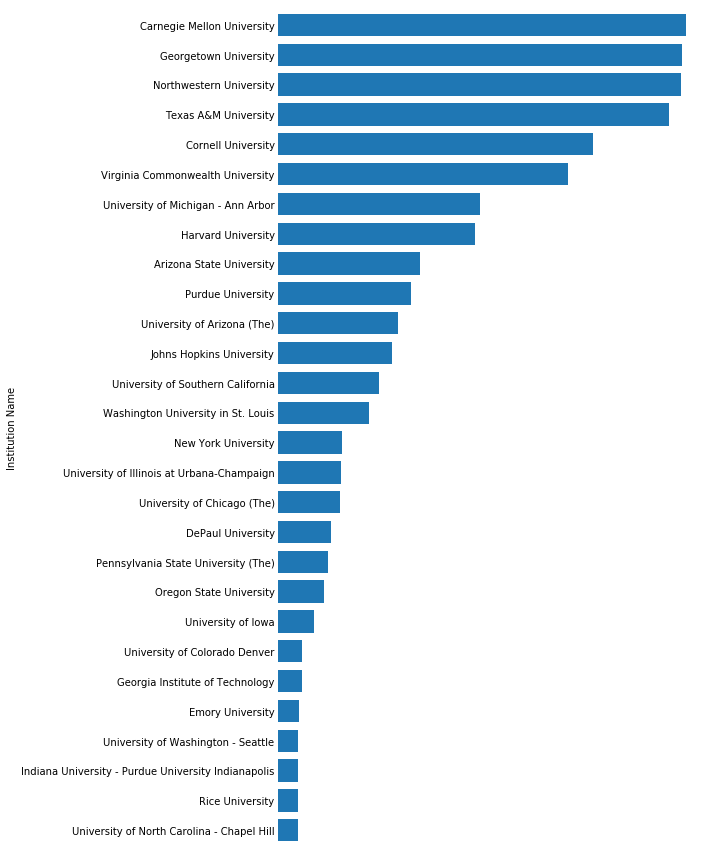

In [68]:
df2.sort_values(by='Foreign Gift Amount').plot(x='Institution Name',
                                                y ='Foreign Gift Amount', 
                                                kind= 'barh',
                                                figsize=(10,12),
                                                legend = None,
                                                width = .75,
                                                )
plt.xscale('log')
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
ax1.tick_params(axis=u'both', which=u'both',length=0)
x_axis.set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.tight_layout()
plt.savefig('university.pdf')


In [27]:
df2.columns

Index(['Institution Name', 'ID', 'OPEID', 'Foreign Gift Amount'], dtype='object')

In [29]:
df2.shape

(28, 4)

In [69]:
df2

,Institution Name,ID,OPEID,Foreign Gift Amount
1,Carnegie Mellon University,61434,7132400,376325840
5,Georgetown University,50341,3468000,350874324
11,Northwestern University,495681,9738400,340244432
16,Texas A&M University,1328192,57385600,274710107
2,Cornell University,359498,20332500,65780453
26,Virginia Commonwealth University,76978,2614500,40668808
22,University of Michigan - Ann Arbor,204259,3022500,7860694
7,Harvard University,27794,1293000,7077754
0,Arizona State University,410604,4324000,2515184
14,Purdue University,55358,1277500,2112466
